In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Read all data and store in a big dataframe

In [59]:
big_df = pd.read_csv('CheckeeData.csv')

In [60]:
big_df.head()

,check_date,complete_date,loc,major,status,type,visa,waiting_days
0,2015-07-01,2015-08-10,ShenYang,Molecular Biolgoy,Clear,New,H1,40
1,2015-07-01,2015-07-31,ShenYang,Biomedical Engineering,Clear,Renewal,F1,30
2,2015-07-01,0000-00-00,BeiJing,NaN,Pending,New,B2,1312
3,2015-07-01,2015-07-14,ShenYang,Project Manangement,Clear,New,F1,13
4,2015-07-01,2015-08-19,Others,Computer Engineering,Clear,Renewal,F1,49


In [61]:
big_df.shape

(27831, 8)

In [5]:
big_df["status"].unique()

array(['Clear', 'Pending', 'Reject'], dtype=object)

In [6]:
valid_big_df = big_df.loc[(big_df["status"] == "Clear") | (big_df["status"] == "Reject")]

In [7]:
valid_big_df.shape

(23158, 8)

In [8]:
print(max(valid_big_df["waiting_days"]))
print(min(valid_big_df["waiting_days"]))

964
-336


In [9]:
valid_big_df[valid_big_df["waiting_days"] == max(valid_big_df["waiting_days"])]

,check_date,complete_date,loc,major,status,type,visa,waiting_days
12380,2011-05-19,2014-01-07,BeiJing,Computer Science,Clear,New,F1,964


In [10]:
print(valid_big_df["waiting_days"].nlargest(20))
print(valid_big_df["waiting_days"].nsmallest(10))

12380    964
5478     909
6914     785
26330    611
26462    596
2420     529
8556     511
15263    509
8546     454
1960     427
25883    424
27001    395
19437    392
23869    386
26032    378
8395     374
24644    365
23965    347
24232    333
18137    328
Name: waiting_days, dtype: int64
11455   -336
16875   -333
17275   -330
27642   -324
27640   -323
1204    -312
15460   -191
19528     -7
10958     -4
265        0
Name: waiting_days, dtype: int64


In [11]:
valid_big_df[valid_big_df["waiting_days"] ==392]

,check_date,complete_date,loc,major,status,type,visa,waiting_days
19437,2014-07-15,2015-08-11,ChengDu,Computational Chemistry,Clear,New,F1,392


In [12]:
valid_big_df = valid_big_df.loc[valid_big_df["waiting_days"] < 392]
valid_big_df = valid_big_df.loc[valid_big_df["waiting_days"]>0]

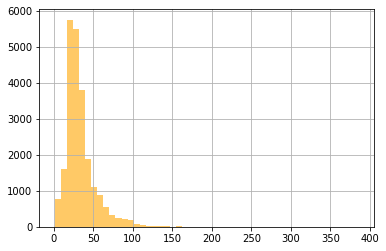

In [13]:
valid_big_df["waiting_days"].hist(bins=50,alpha=0.6,color='orange')

In [14]:
valid_big_df.shape

(23101, 8)

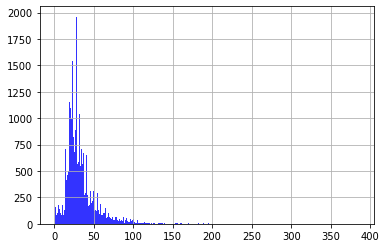

In [15]:
valid_big_df["waiting_days"].hist(bins=300,alpha=0.8,color='blue')

In [16]:
valid_big_df["check_date"] = pd.to_datetime(valid_big_df["check_date"])
valid_big_df["complete_date"] = pd.to_datetime(valid_big_df["complete_date"])

In [17]:
valid_big_df["check_year"] = valid_big_df["check_date"].apply(lambda x: x.year)
valid_big_df["check_month"] = valid_big_df["check_date"].apply(lambda x: x.month)

valid_big_df = valid_big_df[~valid_big_df["check_year"].isin(['2008','2019'])]
valid_big_df = valid_big_df[valid_big_df["type"] != ""]

valid_big_df = valid_big_df[valid_big_df["loc"] != ""]

valid_big_df.dropna(subset=['major'],inplace = True)

valid_big_df["major"] = valid_big_df["major"].apply(lambda x: x.lower())
valid_big_df["major"] = valid_big_df["major"].apply(lambda x: x.strip())

In [18]:
unique_majors = list(valid_big_df['major'].unique())
len(unique_majors)

2431

In [19]:
'electrical engineering'

'electrical engineering'

In [20]:
Counter(valid_big_df['major']).most_common(100)

[('ee', 2650),
 ('cs', 2596),
 ('chemistry', 1116),
 ('computer science', 964),
 ('physics', 784),
 ('me', 676),
 ('biology', 642),
 ('ece', 559),
 ('mechanical engineering', 544),
 ('chemical engineering', 534),
 ('mse', 263),
 ('biochemistry', 245),
 ('biomedical engineering', 223),
 ('electrical engineering', 221),
 ('materials science', 185),
 ('bioinformatics', 164),
 ('computer engineering', 162),
 ('bme', 133),
 ('medicine', 125),
 ('statistics', 114),
 ('biostatistics', 110),
 ('material science', 104),
 ('neuroscience', 103),
 ('pharmacology', 102),
 ('microbiology', 96),
 ('chem', 95),
 ('ce', 85),
 ('civil engineering', 84),
 ('materials science and eng', 82),
 ('optics', 80),
 ('bio', 78),
 ('materials', 78),
 ('bioengineering', 74),
 ('immunology', 73),
 ('aerospace engineering', 71),
 ('biomedical sciences', 69),
 ('genetics', 66),
 ('industrial engineering', 64),
 ('biomedical', 62),
 ('environmental engineering', 61),
 ('math', 61),
 ('microelectronics', 60),
 ('automat

In [21]:
d = {'ee': 'electrical engineering', 
     'cs': 'computer science', 
     'me': 'mechanical engineering', 
     'mse': 'materials science', 
     'bme': 'biomedical engineering',
     'material science': 'materials science',
     'chem':'chemical engineering',
     'ce':'computer engineering',
     'materials science and eng':'materials science',
     'bio':'biology',
     'materials':'materials science',
     'biomedical':'biomedical engineering',
     'biomedical science':"biology",
     'materials engineering':'materials science',
     'math':'mathematics',
     'biochem':'biochemistry',
     'gis':'geo information system',
     'cheme':'chemical engineering',
     'biotechnology':'biology',
     'optical engineering':'optics',
     'applied math':'mathematics',
     'applied mathematics':'mathematics',
     'ece':'electrical engineering',
     'che':'chemical engineering',
     'eecs':'computer science',
     'material':'materials science',
     'pharmaceutical science':'pharmaceutical sciences',
     'mechanical':'mechanical engineering',
     'electrical and computer e':'electrical engineering',
     'aerospace':'aerospace engineering',
     'pharmaceutics':'pharmaceutical sciences',
     'ie':'industrial engineering',
     'polymer science':'polymer',
     'material engineering':'material sciences',
     'material science and engi':'material sciences',
     'ae':'aerospace engineering',
     'mis':'information science'
    }

valid_big_df["major"] = valid_big_df["major"].replace(d)

In [22]:
major_majors = [m for m, c in Counter(valid_big_df['major']).most_common(100) if c >= 20]
valid_big_df = valid_big_df.loc[valid_big_df["major"].isin(major_majors)]
most_majors = major_majors[:20]

In [23]:
len(valid_big_df['major'].unique())

81

In [24]:
valid_big_df["visa_type"] = valid_big_df["visa"] + "_" + valid_big_df["type"]

In [25]:
valid_big_df.head()

,check_date,complete_date,loc,major,status,type,visa,waiting_days,check_year,check_month,visa_type
1,2015-07-01,2015-07-31,ShenYang,biomedical engineering,Clear,Renewal,F1,30,2015,7,F1_Renewal
4,2015-07-01,2015-08-19,Others,computer engineering,Clear,Renewal,F1,49,2015,7,F1_Renewal
5,2015-07-01,2015-08-05,ShenYang,materials science,Clear,New,F1,35,2015,7,F1_New
9,2015-07-01,2015-08-06,BeiJing,electrical engineering,Clear,Renewal,F1,36,2015,7,F1_Renewal
11,2015-07-01,2015-07-31,BeiJing,computer science,Clear,New,H1,30,2015,7,H1_New


In [26]:
valid_big_df["visa"].unique()

array(['F1', 'H1', 'B1', 'J1', 'L1', 'H4', 'J2', 'B2', 'F2', 'L2', 'O1'],
      dtype=object)

In [27]:
# Ideas:
# major counts vs time, 看出来哪些专业是一直审查严格，哪些专业是最近才审查严格

# In general

## Waiting time vs check year

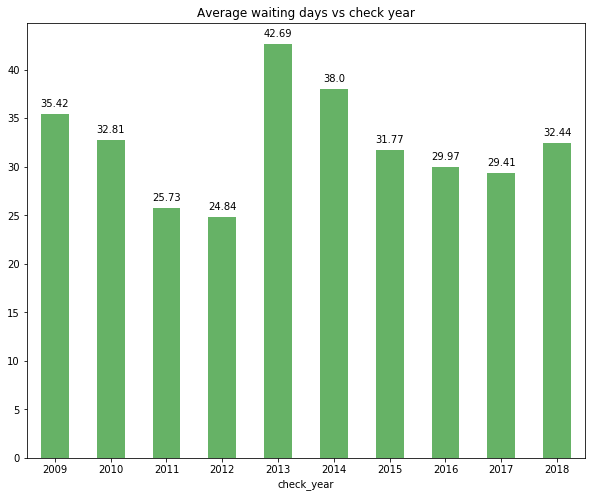

In [28]:
ax = valid_big_df.groupby("check_year")["waiting_days"].mean().plot(
    kind='bar',title="Average waiting days vs check year", figsize=(10,8), rot=0,
    alpha = 0.6, color = 'green')
for p in ax.patches: ax.annotate(np.round(p.get_height(),decimals=2), 
                                 (p.get_x()+p.get_width()/2., p.get_height()), 
                                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

## Waiting time vs check year

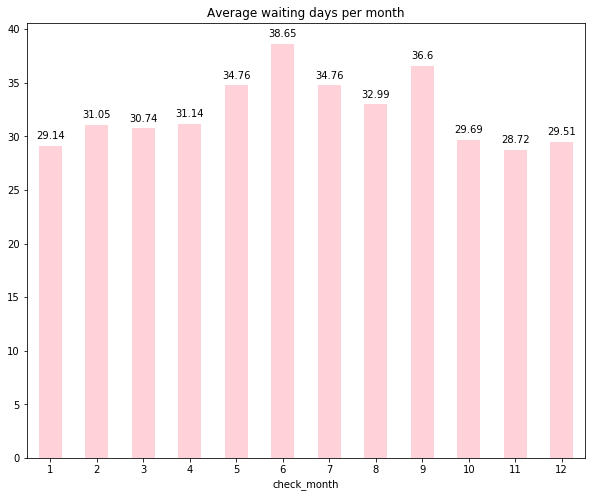

In [29]:
ax = valid_big_df.groupby("check_month")["waiting_days"].mean().plot(
    kind='bar',title="Average waiting days per month", figsize=(10,8), rot=0,
    alpha = 0.7, color = 'pink')
for p in ax.patches: ax.annotate(np.round(p.get_height(),decimals=2), 
                                 (p.get_x()+p.get_width()/2., p.get_height()), 
                                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

## Rej vs visa type

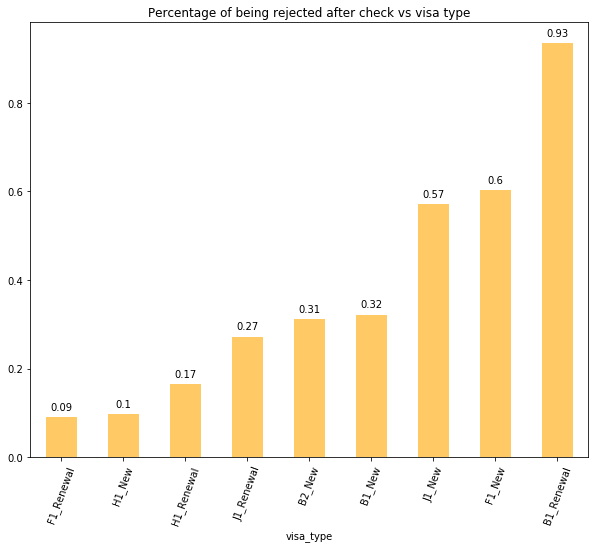

In [30]:
deny_counts_by_visa_type = valid_big_df[valid_big_df["status"] == "Reject"].groupby(['visa_type'])["check_date"].count()
deny_ratio_by_visa_type = 100*deny_counts_by_visa_type / valid_big_df.groupby(['visa_type'])["check_date"].count()
deny_ratio_by_visa_type = pd.DataFrame(deny_ratio_by_visa_type[deny_ratio_by_visa_type.notnull()])
deny_ratio_by_visa_type = deny_ratio_by_visa_type.reset_index()
deny_ratio_by_visa_type.sort_values('check_date', inplace=True, ascending=True)
ax = deny_ratio_by_visa_type.plot(kind='bar', y="check_date",x="visa_type",title="Percentage of being rejected after check vs visa type",figsize=(10,8), rot=70, legend=False, alpha = 0.6, color = 'orange')
for p in ax.patches: ax.annotate(np.round(p.get_height(),decimals=2), 
                                 (p.get_x()+p.get_width()/2., p.get_height()), 
                                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

## Rej vs check year

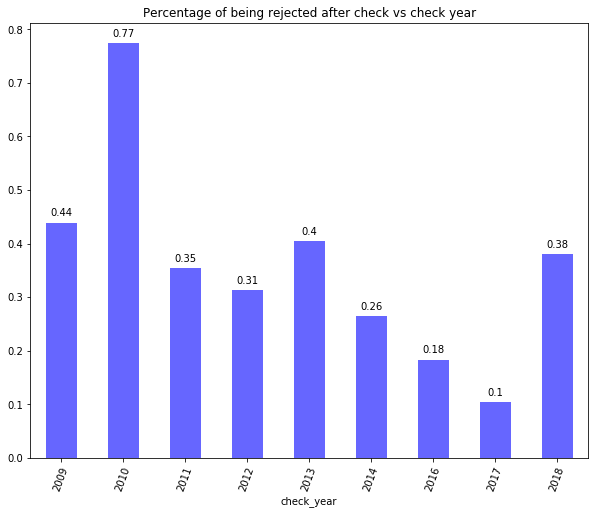

In [31]:
deny_counts_by_year = valid_big_df[valid_big_df["status"] == "Reject"].groupby(['check_year'])["check_date"].count()
deny_ratio_by_year = 100*deny_counts_by_year / valid_big_df.groupby(['check_year'])["check_date"].count()
deny_ratio_by_year = pd.DataFrame(deny_ratio_by_year[deny_ratio_by_year.notnull()])
deny_ratio_by_year = deny_ratio_by_year.reset_index()
ax = deny_ratio_by_year.plot(kind='bar', y="check_date",x="check_year",title="Percentage of being rejected after check vs check year",figsize=(10,8), rot=70, legend=False, alpha = 0.6, color = 'blue')
for p in ax.patches: ax.annotate(np.round(p.get_height(),decimals=2), 
                                 (p.get_x()+p.get_width()/2., p.get_height()), 
                                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

## Waiting days vs Visa type

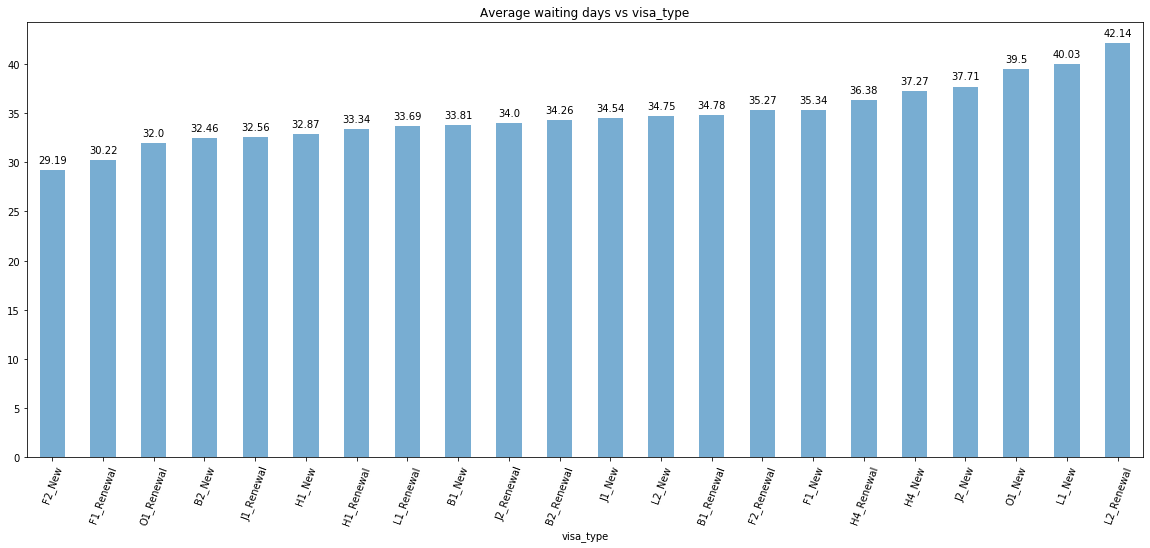

In [32]:
wd_visa = pd.DataFrame(valid_big_df.groupby("visa_type")["waiting_days"].mean())
wd_visa = wd_visa.reset_index()
wd_visa.sort_values('waiting_days', inplace=True, ascending=True)
ax = wd_visa.plot(kind='bar', x='visa_type',y='waiting_days',title="Average waiting days vs visa_type", figsize=(20,8), rot=70, legend=False, alpha = 0.6)
for p in ax.patches: ax.annotate(np.round(p.get_height(),decimals=2), 
                                 (p.get_x()+p.get_width()/2., p.get_height()), 
                                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

## Waiting days vs consulate

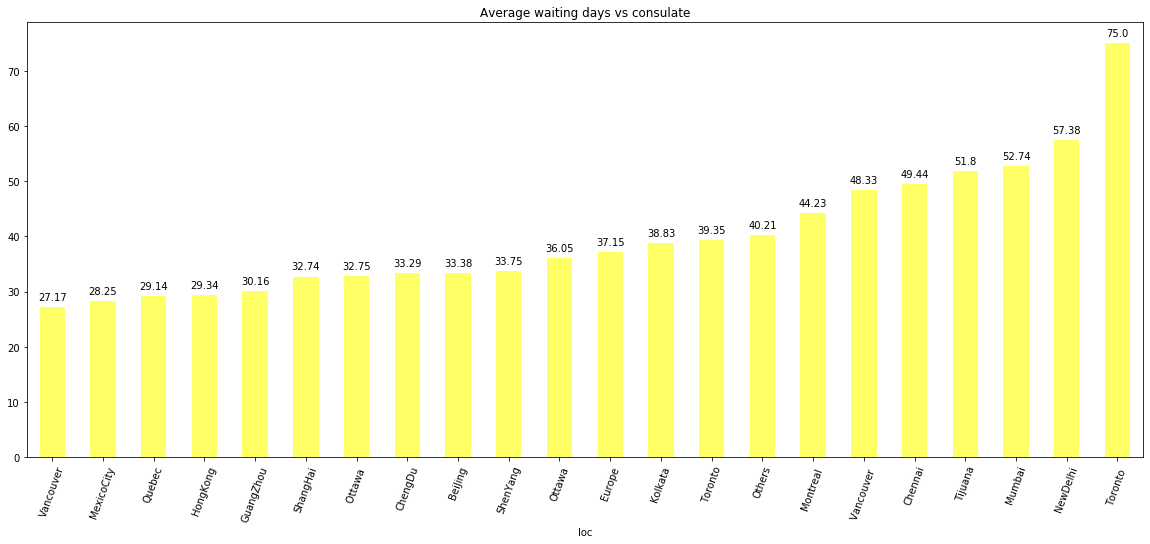

In [33]:
wd_consulate = pd.DataFrame(valid_big_df.groupby("loc")["waiting_days"].mean()).reset_index()
wd_consulate.sort_values('waiting_days', inplace=True, ascending=True)
ax = wd_consulate.plot(kind='bar', x='loc',y='waiting_days',title="Average waiting days vs consulate", figsize=(20,8), rot=70, legend=False, alpha = 0.6, color = 'yellow')
for p in ax.patches: ax.annotate(np.round(p.get_height(),decimals=2), 
                                 (p.get_x()+p.get_width()/2., p.get_height()), 
                                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

## Top check majors | dangerous majors

In [34]:
counts_majors = pd.DataFrame(valid_big_df.groupby("major")['check_date'].count())
counts_majors = counts_majors.reset_index()
counts_majors.sort_values('check_date', inplace=True, ascending=False)
counts_majors = counts_majors.set_index("major")

In [35]:
counts_majors = pd.DataFrame(valid_big_df.groupby("major")['check_date'].count())
counts_majors = counts_majors.reset_index()
counts_majors.sort_values('check_date', inplace=True, ascending=False)
counts_majors = counts_majors.set_index("major")
#the top
counts_majors_top = counts_majors[:8].copy()

#others
counts_majors_other = pd.DataFrame(data = {
    'major' : ['others'],
    'check_date' : [counts_majors['check_date'][8:].sum()]
})
counts_majors_other = counts_majors_other.set_index("major")
#combining top  with others
counts_majors_all = pd.concat([counts_majors_top, counts_majors_other])

In [36]:
counts_majors_all = counts_majors_all.reset_index()
counts_majors_all

,major,check_date
0,computer science,3595
1,electrical engineering,3458
2,mechanical engineering,1253
3,chemistry,1116
4,biology,820
5,materials science,799
6,physics,784
7,chemical engineering,711
8,others,4666


In [37]:
counts_majors_all.to_csv("num_major.csv", index=False)

In [38]:
counts_majors_all.to_csv("num_major.csv", index=False)

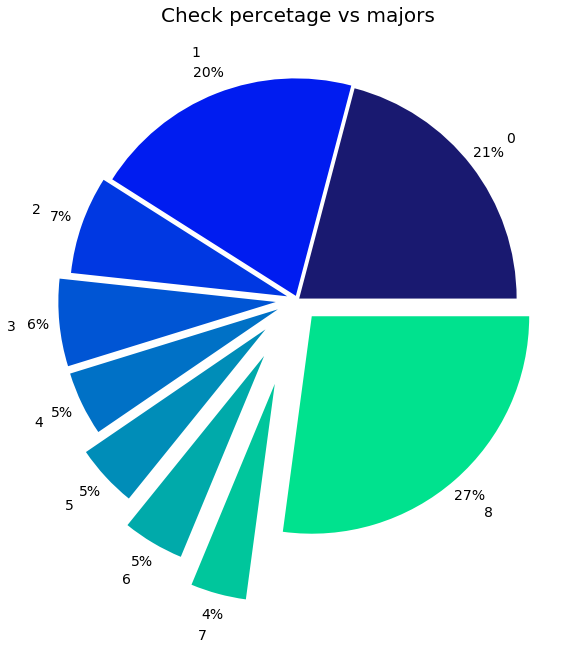

In [39]:
explode = (0.01, 0.02, 0.05, 0.1, 0.1, 0.2, 0.3, 0.4, 0.1)
colors = ['#191970', '#001CF0', '#0038E2', '#0055D4', '#0071C6', '#008DB8', '#00AAAA',
          '#00C69C', '#00E28E']
#'#00FF80', 
#counts.plot(kind='pie', )
ax = counts_majors_all.plot.pie(y='check_date',figsize=(10, 10),fontsize=14, colors=colors, 
                           explode=explode,title='Check percetage vs majors',
                           labels=counts_majors_all.index, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,
                           legend=False)
plt.ylabel('')
ax.title.set_size(20)
#plt.legend(labels=counts_majors_all.index, loc="best")

## Waiting days vs majors

In [40]:
valid_big_df_major = valid_big_df[valid_big_df["major"].isin(most_majors)]
pd.DataFrame(valid_big_df_major.groupby("major")['waiting_days'].mean())

,waiting_days
major,
aerospace engineering,54.096774
biochemistry,34.603390
bioinformatics,33.280488
biology,32.923171
biomedical engineering,31.734450
biostatistics,30.781818
chemical engineering,33.270042
chemistry,33.535842
computer engineering,32.076923


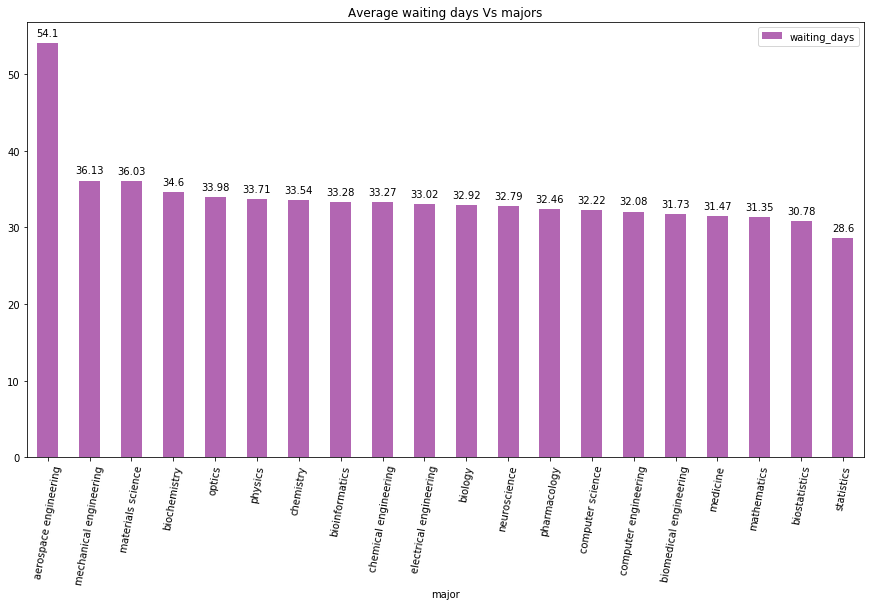

In [41]:
major_counts_majors = pd.DataFrame(valid_big_df_major.groupby("major")['waiting_days'].mean())
major_counts_majors = major_counts_majors.reset_index()
major_counts_majors.sort_values('waiting_days', inplace=True, ascending=False)
ax = major_counts_majors.plot(y='waiting_days',x='major',
    kind='bar',title="Average waiting days Vs majors", figsize=(15,8), rot=80, alpha = 0.6, color = 'purple')
for p in ax.patches: ax.annotate(np.round(p.get_height(),decimals=2), 
                                 (p.get_x()+p.get_width()/2., p.get_height()), 
                                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [42]:
major_counts_majors.to_csv("wait_majors.csv", index=False)

## Deny pctg vs majors

In [43]:
valid_big_df_deny = valid_big_df[valid_big_df['status']=='Reject']
counts_majors = pd.DataFrame(valid_big_df_deny.groupby("major")['check_date'].count())
counts_majors = counts_majors.reset_index()
counts_majors.sort_values('check_date', inplace=True, ascending=False)
counts_majors = counts_majors.set_index("major")
#the top
counts_majors_top = counts_majors[:8].copy()

#others
counts_majors_other = pd.DataFrame(data = {
    'major' : ['others'],
    'check_date' : [counts_majors['check_date'][8:].sum()]
})
counts_majors_other = counts_majors_other.set_index("major")
#combining top  with others
counts_majors_all = pd.concat([counts_majors_top, counts_majors_other])

In [44]:
counts_majors_all = counts_majors_all.reset_index()

In [45]:
counts_majors_all 

,major,check_date
0,mechanical engineering,14
1,aerospace engineering,9
2,computer science,8
3,electrical engineering,5
4,materials science,4
5,statistics,2
6,law,1
7,physics,1
8,others,11


In [46]:
deny_ratio_by_visa_type = 100*deny_counts_by_visa_type / valid_big_df.groupby(['visa_type'])["check_date"].count()

In [47]:
counts_majors_all["pctg"] = 100*counts_majors_all["check_date"]/sum(counts_majors_all["check_date"])

In [48]:
counts_majors_all[["major","pctg"]].to_csv("rej_major.csv", index=False)

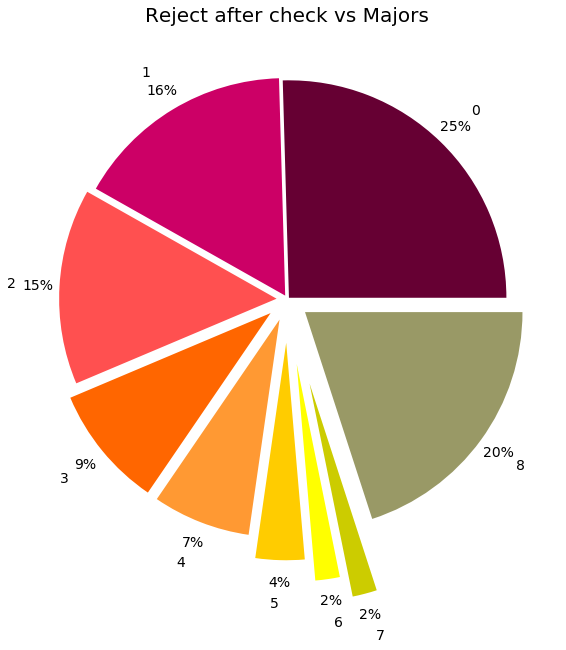

In [49]:
explode = (0.01, 0.02, 0.05, 0.1, 0.1, 0.2, 0.3, 0.4, 0.1)
colors = ['#660033', '#cc0066', '#ff5050', '#ff6600', '#ff9933', '#ffcc00', '#ffff00',
          '#cccc00', '#999966']
#'#00FF80', 
#counts.plot(kind='pie', )
ax = counts_majors_all.plot.pie(y='check_date',figsize=(10, 10),fontsize=14, colors=colors, 
                           explode=explode,title='Reject after check vs Majors',
                           labels=counts_majors_all.index, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,
                           legend=False)
plt.ylabel('')
ax.title.set_size(20)
#plt.legend(labels=counts_majors_all.index, loc="best")

In [50]:
valid_big_df.head()

,check_date,complete_date,loc,major,status,type,visa,waiting_days,check_year,check_month,visa_type
1,2015-07-01,2015-07-31,ShenYang,biomedical engineering,Clear,Renewal,F1,30,2015,7,F1_Renewal
4,2015-07-01,2015-08-19,Others,computer engineering,Clear,Renewal,F1,49,2015,7,F1_Renewal
5,2015-07-01,2015-08-05,ShenYang,materials science,Clear,New,F1,35,2015,7,F1_New
9,2015-07-01,2015-08-06,BeiJing,electrical engineering,Clear,Renewal,F1,36,2015,7,F1_Renewal
11,2015-07-01,2015-07-31,BeiJing,computer science,Clear,New,H1,30,2015,7,H1_New


In [51]:
valid_big_df[['major', 'check_date','check_year']].groupby(["major","check_year"]).count()

check_date
major                 check_year            
accounting            2009                 3
                      2011                 1
                      2012                 1
                      2013                 1
                      2014                 5
                      2015                 4
                      2016                 8
                      2017                22
                      2018                12
aerospace engineering 2009                10
                      2010                18
                      2011                10
                      2012                 3
                      2013                18
                      2014                20
                      2015                12
                      2016                11
                      2017                14
                      2018                 8
analytical chemistry  2010                 6
                      2011                 2
                      2013                 3
                      2015                 4
                      2016                 4
                      2017                 2
                      2018                 4
applied physics       2009                 1
                      2010                 2
                      2011                 1
                      2012                 1
...                                      ...
software engineer     2017                 9
                      2018                 8
software engineering  2010                 2
                      2011                 1
                      2012                 1
                      2013                 3
                      2014                 2
                      2015                 3
                      2016                 7
                      2017                11
                      2018                19
statistics            2009                 2
                      2010                 9
                      2011                 8
                      2012                 4
                      2013                13
                      2014                 4
                      2015                 4
                      2016                16
                      2017                18
                      2018                36
telecommunication     2010                 3
                      2011                 2
                      2012                 2
                      2013                 1
                      2014                 2
                      2015                 5
                      2016                 2
                      2017                 3
                      2018                 6

[752 rows x 1 columns]

# Personal

In [52]:
valid_big_df.head()

,check_date,complete_date,loc,major,status,type,visa,waiting_days,check_year,check_month,visa_type
1,2015-07-01,2015-07-31,ShenYang,biomedical engineering,Clear,Renewal,F1,30,2015,7,F1_Renewal
4,2015-07-01,2015-08-19,Others,computer engineering,Clear,Renewal,F1,49,2015,7,F1_Renewal
5,2015-07-01,2015-08-05,ShenYang,materials science,Clear,New,F1,35,2015,7,F1_New
9,2015-07-01,2015-08-06,BeiJing,electrical engineering,Clear,Renewal,F1,36,2015,7,F1_Renewal
11,2015-07-01,2015-07-31,BeiJing,computer science,Clear,New,H1,30,2015,7,H1_New


In [53]:
import datetime
import dateutil.relativedelta

In [54]:
date_entry = input('Enter a date in YYYY-MM-DD format')
year, month, day = map(int, date_entry.split('-'))
d2 = pd.Timestamp(year, month, day)
print(valid_big_df[valid_big_df['check_date'] == d2])

Enter a date in YYYY-MM-DD format2016-05-05
      check_date complete_date       loc                   major status  \
22403 2016-05-05    2016-05-24   BeiJing    chemical engineering  Clear   
22404 2016-05-05    2016-06-01  ShangHai  electrical engineering  Clear   
22405 2016-05-05    2016-05-23   BeiJing               chemistry  Clear   
22406 2016-05-05    2016-05-25   ChengDu  industrial engineering  Clear   
22408 2016-05-05    2016-06-14   ChengDu  electrical engineering  Clear   
22409 2016-05-05    2016-06-06  ShangHai               chemistry  Clear   
22410 2016-05-05    2016-05-31  ShangHai    chemical engineering  Clear   

          type visa  waiting_days  check_year  check_month   visa_type  
22403      New   B2            19        2016            5      B2_New  
22404      New   F1            27        2016            5      F1_New  
22405  Renewal   F1            18        2016            5  F1_Renewal  
22406      New   B2            20        2016            5     

In [55]:
valid_big_df['type'].unique()

array(['Renewal', 'New', nan], dtype=object)

In [56]:
# Personal Info
check_date = '2019-01-07'
visa = 'F1'
v_type = 'Renewal'
major = 'computer science'
loc = 'BeiJing'

In [57]:
check_date_time = datetime.datetime.strptime(check_date, "%Y-%m-%d")
check_month_ago = check_date_time - dateutil.relativedelta.relativedelta(months=1)


P_valid_big_df = valid_big_df[(valid_big_df['check_date'] >= check_month_ago) & 
                             (valid_big_df['check_date'] <= check_date_time) &
                             (valid_big_df['visa'] == visa) & 
                             (valid_big_df['type'] == v_type) &
                             (valid_big_df['major'] == major) &
                             (valid_big_df['loc'] == loc)]

expected_waiting_time = P_valid_big_df["waiting_days"].mean()

print(expected_waiting_time)

31.4375


'medians = P_valid_big_df["waiting_days"].median()\nmedian_labels = str(np.round(medians, 2)) \npos = range(1)\nax.text(3+0.2, 4.5, median_labels, \n        horizontalalignment=\'center\', size=\'x-small\', color=\'w\', weight=\'semibold\')'

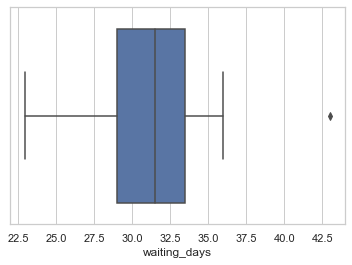

In [58]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=P_valid_big_df["waiting_days"])
"""medians = P_valid_big_df["waiting_days"].median()
median_labels = str(np.round(medians, 2)) 
pos = range(1)
ax.text(3+0.2, 4.5, median_labels, 
        horizontalalignment='center', size='x-small', color='w', weight='semibold')"""